In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.colors as colors
from sklearn import linear_model
from sklearn.cluster import KMeans

In [3]:

data = pd.read_csv("/home/datascience/Downloads/songDb.tsv", sep='\t', encoding="ISO-8859-1",
                  usecols=['Name','Danceability','Energy','Key','Loudness','Mode','Speechness','Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Genre'])

#drops the 28 incomplete case
data=pd.DataFrame.dropna(data, axis=0, how="any")
data.index = range(len(data))
data

/home/datascience/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.1100,0.3240,131.926,celticmetal
1,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.3060,0.4440,135.996,celticmetal
2,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.1230,0.2970,114.223,celticmetal
3,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.2760,0.4810,86.953,celticmetal
4,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.1610,0.3290,125.993,celticmetal
5,WelcometoHell,0.430,0.797,2.0,-5.907,0.0,0.0303,0.000308,0.056600,0.3230,0.3520,147.982,celticmetal
6,Ambiramus,0.434,0.908,6.0,-4.715,1.0,0.0936,0.007910,0.000000,0.6620,0.4610,126.331,celticmetal
7,Gunman,0.308,0.965,8.0,-3.172,1.0,0.0591,0.000023,0.064800,0.1170,0.1890,175.036,celticmetal
8,NoMoreHollywoodEndings,0.500,0.925,4.0,-3.467,0.0,0.0378,0.000940,0.000000,0.2940,0.3720,92.988,celticmetal
9,Promises,0.479,0.977,2.0,-4.515,1.0,0.0860,0.000017,0.000053,0.2980,0.1390,150.01,celticmetal


In [4]:
data.describe()

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence
count,131552.000000,131552.000000,131552.000000,131552.000000,131552.000000,131552.000000,131552.000000,131552.000000,131552.00000,131552.000000
mean,0.553772,0.648034,5.313937,-8.525294,0.619101,0.083662,0.271049,0.231881,0.19329,0.469198
std,0.182674,0.245702,3.565632,4.787954,0.485610,0.101340,0.323500,0.353769,0.16254,0.265592
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.432000,0.487000,2.000000,-10.378250,0.000000,0.035900,0.007957,0.000002,0.09510,0.246000
50%,0.566000,0.690000,5.000000,-7.378000,1.000000,0.048300,0.105000,0.001480,0.12500,0.459000
75%,0.692000,0.853000,9.000000,-5.345000,1.000000,0.083000,0.488000,0.503000,0.24600,0.682000
max,0.988000,1.000000,11.000000,5.056000,1.000000,0.966000,0.996000,0.999000,1.00000,1.000000


In [5]:
#nomalizes Key
#Create x, where x the 'scores' column's values as floats
x = data[['Key']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# # Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
#pd.DataFrame(x_scaled).describe()

# # Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
# # df_normalized
data.Key = df_normalized.astype(float)
data




,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,YuveYuveYu,0.624,0.857,0.909091,-6.250,0.0,0.0542,0.020800,0.206000,0.1100,0.3240,131.926,celticmetal
1,Gloryhammer,0.517,0.916,0.000000,-4.933,1.0,0.0559,0.000182,0.001910,0.3060,0.4440,135.996,celticmetal
2,Nostos,0.251,0.894,0.727273,-4.103,0.0,0.0570,0.014400,0.000000,0.1230,0.2970,114.223,celticmetal
3,Yggdrasil,0.469,0.743,0.090909,-5.570,0.0,0.0272,0.002220,0.000111,0.2760,0.4810,86.953,celticmetal
4,Incense&Iron,0.487,0.952,0.090909,-4.429,0.0,0.0613,0.000228,0.000000,0.1610,0.3290,125.993,celticmetal
5,WelcometoHell,0.430,0.797,0.181818,-5.907,0.0,0.0303,0.000308,0.056600,0.3230,0.3520,147.982,celticmetal
6,Ambiramus,0.434,0.908,0.545455,-4.715,1.0,0.0936,0.007910,0.000000,0.6620,0.4610,126.331,celticmetal
7,Gunman,0.308,0.965,0.727273,-3.172,1.0,0.0591,0.000023,0.064800,0.1170,0.1890,175.036,celticmetal
8,NoMoreHollywoodEndings,0.500,0.925,0.363636,-3.467,0.0,0.0378,0.000940,0.000000,0.2940,0.3720,92.988,celticmetal
9,Promises,0.479,0.977,0.181818,-4.515,1.0,0.0860,0.000017,0.000053,0.2980,0.1390,150.01,celticmetal


In [6]:
#nomalizes Loudness
# Create x, where x the 'scores' column's values as floats
x = data[['Loudness']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
# df_normalized
data = data.assign(Loudness=df_normalized)
data

,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,YuveYuveYu,0.624,0.857,0.909091,0.826211,0.0,0.0542,0.020800,0.206000,0.1100,0.3240,131.926,celticmetal
1,Gloryhammer,0.517,0.916,0.000000,0.846455,1.0,0.0559,0.000182,0.001910,0.3060,0.4440,135.996,celticmetal
2,Nostos,0.251,0.894,0.727273,0.859214,0.0,0.0570,0.014400,0.000000,0.1230,0.2970,114.223,celticmetal
3,Yggdrasil,0.469,0.743,0.090909,0.836664,0.0,0.0272,0.002220,0.000111,0.2760,0.4810,86.953,celticmetal
4,Incense&Iron,0.487,0.952,0.090909,0.854203,0.0,0.0613,0.000228,0.000000,0.1610,0.3290,125.993,celticmetal
5,WelcometoHell,0.430,0.797,0.181818,0.831484,0.0,0.0303,0.000308,0.056600,0.3230,0.3520,147.982,celticmetal
6,Ambiramus,0.434,0.908,0.545455,0.849806,1.0,0.0936,0.007910,0.000000,0.6620,0.4610,126.331,celticmetal
7,Gunman,0.308,0.965,0.727273,0.873524,1.0,0.0591,0.000023,0.064800,0.1170,0.1890,175.036,celticmetal
8,NoMoreHollywoodEndings,0.500,0.925,0.363636,0.868990,0.0,0.0378,0.000940,0.000000,0.2940,0.3720,92.988,celticmetal
9,Promises,0.479,0.977,0.181818,0.852881,1.0,0.0860,0.000017,0.000053,0.2980,0.1390,150.01,celticmetal


In [7]:
# nomalizes Tempo
# Create x, where x the 'scores' column's values as floats
x = data[['Tempo']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
# df_normalized
data = data.assign(Tempo=df_normalized)

data = pd.DataFrame.dropna(data, axis=0, how="any")
data

,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,YuveYuveYu,0.624,0.857,0.909091,0.826211,0.0,0.0542,0.020800,0.206000,0.1100,0.3240,0.531818,celticmetal
1,Gloryhammer,0.517,0.916,0.000000,0.846455,1.0,0.0559,0.000182,0.001910,0.3060,0.4440,0.548225,celticmetal
2,Nostos,0.251,0.894,0.727273,0.859214,0.0,0.0570,0.014400,0.000000,0.1230,0.2970,0.460454,celticmetal
3,Yggdrasil,0.469,0.743,0.090909,0.836664,0.0,0.0272,0.002220,0.000111,0.2760,0.4810,0.350524,celticmetal
4,Incense&Iron,0.487,0.952,0.090909,0.854203,0.0,0.0613,0.000228,0.000000,0.1610,0.3290,0.507901,celticmetal
5,WelcometoHell,0.430,0.797,0.181818,0.831484,0.0,0.0303,0.000308,0.056600,0.3230,0.3520,0.596543,celticmetal
6,Ambiramus,0.434,0.908,0.545455,0.849806,1.0,0.0936,0.007910,0.000000,0.6620,0.4610,0.509264,celticmetal
7,Gunman,0.308,0.965,0.727273,0.873524,1.0,0.0591,0.000023,0.064800,0.1170,0.1890,0.705603,celticmetal
8,NoMoreHollywoodEndings,0.500,0.925,0.363636,0.868990,0.0,0.0378,0.000940,0.000000,0.2940,0.3720,0.374852,celticmetal
9,Promises,0.479,0.977,0.181818,0.852881,1.0,0.0860,0.000017,0.000053,0.2980,0.1390,0.604718,celticmetal


In [8]:
#Correlation matrix
#pd.plotting.scatter_matrix(data.drop(['Name'], axis=1), figsize=(20, 20))
#plt.show()

In [8]:
song_data = data[data["Genre"].isin(['hiphop','modernblues', 'ukpop','funkrock',
                               'country','salsa','beats','jazzfusion',
                     'africangospel','organicambient'])]
song_data.drop_duplicates(keep = False)

realData = song_data.dropna()

train1, test1, train_labels, test_labels=train_test_split(realData.iloc[:,1:12],realData.Genre, test_size=0.2, random_state=3 )



KeyboardInterrupt: 

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


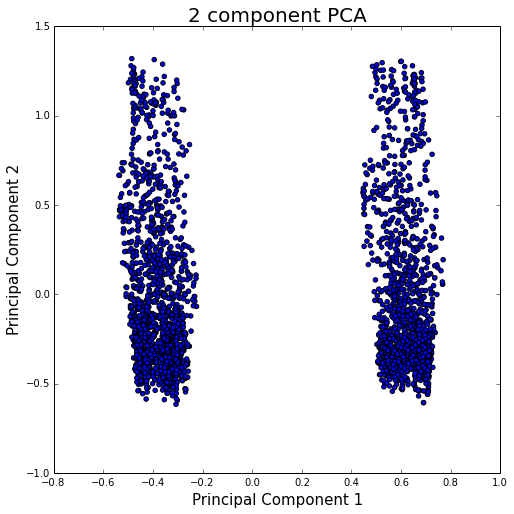

In [10]:
#PCA for the entire daaset
# realData_Genre=pd.DataFrame(realData.Genre)
# realData_Genre.index=range(len(realData_Genre))
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data.iloc[:,1:12])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data.Genre], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# targets = ['hiphop','modernblues', 'ukpop','funkrock',
#              'country','salsa','beats','jazzfusion',
#             'africangospel','organicambient']
# colors = ['black', 'darkorange', 'lightcoral', 'forestgreen', 
#           'blue', 'darkorchid', 'darkcyan', 'deepskyblue', 
#           'yellowgreen','sandybrown']
for i in range(len(data)):
#     indicesToKeep = finalDf['Genre'] == target
    ax.scatter(finalDf.loc[i, 'principal component 1']
               , finalDf.loc[i, 'principal component 2']
#                , c = color
#                , s = 50
              )
# ax.legend(targets)
ax.grid()

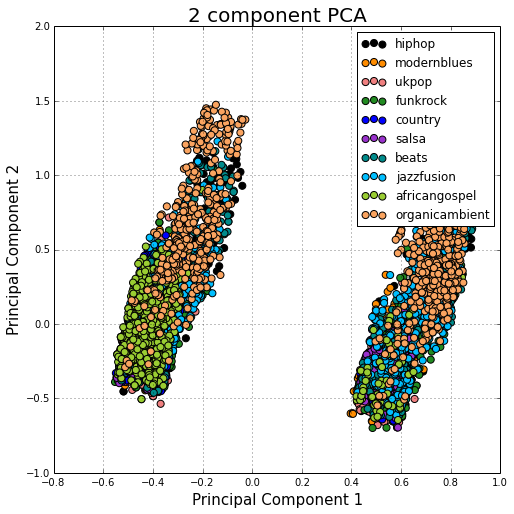

In [39]:
#PCA
realData_Genre=pd.DataFrame(realData.Genre)
realData_Genre.index=range(len(realData_Genre))
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(realData.iloc[:,1:12])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, realData_Genre], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['hiphop','modernblues', 'ukpop','funkrock',
             'country','salsa','beats','jazzfusion',
            'africangospel','organicambient']
colors = ['black', 'darkorange', 'lightcoral', 'forestgreen', 
          'blue', 'darkorchid', 'darkcyan', 'deepskyblue', 
          'yellowgreen','sandybrown']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Genre'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

[ 0.11135447  0.08985255  0.06499958  0.09103064  0.02260919  0.10919042
  0.09654651  0.13256038  0.07735262  0.1208014   0.08370226]


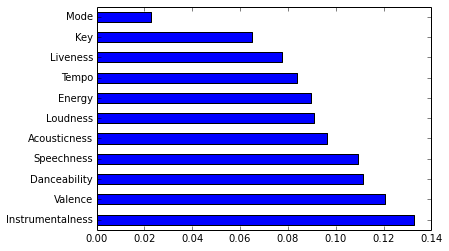

In [35]:
##feature importance
X = train1  #independent columns
y = train_labels    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

/home/datascience/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[ 0.10414158  0.10106791  0.08371977  0.10189272  0.00903423  0.10106795
  0.10394063  0.09172326  0.0952727   0.10325218  0.10488709]


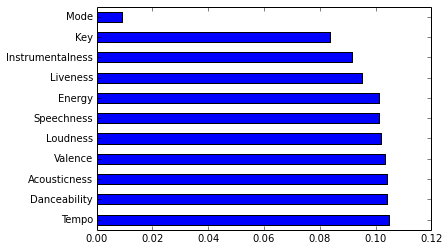

In [34]:
#feature importance using the whole dataset
X = data.iloc[:,1:12]  #independent columns
y = data.iloc[:,12:13]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [78]:
data.drop(['Mode', 'Name'], axis=1)

,Danceability,Energy,Key,Loudness,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,0.624,0.857,0.909091,0.826211,0.0542,0.020800,0.206000,0.1100,0.3240,0.531818,celticmetal
1,0.517,0.916,0.000000,0.846455,0.0559,0.000182,0.001910,0.3060,0.4440,0.548225,celticmetal
2,0.251,0.894,0.727273,0.859214,0.0570,0.014400,0.000000,0.1230,0.2970,0.460454,celticmetal
3,0.469,0.743,0.090909,0.836664,0.0272,0.002220,0.000111,0.2760,0.4810,0.350524,celticmetal
4,0.487,0.952,0.090909,0.854203,0.0613,0.000228,0.000000,0.1610,0.3290,0.507901,celticmetal
5,0.430,0.797,0.181818,0.831484,0.0303,0.000308,0.056600,0.3230,0.3520,0.596543,celticmetal
6,0.434,0.908,0.545455,0.849806,0.0936,0.007910,0.000000,0.6620,0.4610,0.509264,celticmetal
7,0.308,0.965,0.727273,0.873524,0.0591,0.000023,0.064800,0.1170,0.1890,0.705603,celticmetal
8,0.500,0.925,0.363636,0.868990,0.0378,0.000940,0.000000,0.2940,0.3720,0.374852,celticmetal
9,0.479,0.977,0.181818,0.852881,0.0860,0.000017,0.000053,0.2980,0.1390,0.604718,celticmetal


In [79]:
%%time

km = KMeans(n_clusters=10)
km.fit(data.drop(['Mode', 'Name', 'Genre'], axis=1))

CPU times: user 11.4 s, sys: 4.7 s, total: 16.1 s
Wall time: 7.12 s


In [69]:
(km.cluster_centers_)

array([[ 0.49453134,  0.76835806,  0.76647229,  0.82665561,  0.08774977,
         0.06642166,  0.03784885,  0.21830595,  0.33864487,  0.51046259],
       [ 0.60439988,  0.4453892 ,  0.46549351,  0.72190378,  0.06729581,
         0.74483093,  0.82755556,  0.15251195,  0.67880503,  0.48293535],
       [ 0.52894438,  0.74275659,  0.19306743,  0.79483975,  0.0699783 ,
         0.06659984,  0.78537132,  0.19262827,  0.33146842,  0.51262005],
       [ 0.54513103,  0.41267383,  0.74445133,  0.75606629,  0.09974459,
         0.70443132,  0.02668454,  0.19363385,  0.44319279,  0.46751976],
       [ 0.55209507,  0.7460832 ,  0.7716519 ,  0.79345357,  0.07126567,
         0.06221316,  0.78526931,  0.19070093,  0.34603374,  0.51437725],
       [ 0.49140713,  0.76113414,  0.19681269,  0.82605499,  0.08481238,
         0.06590301,  0.0360756 ,  0.22321822,  0.33235933,  0.51136751],
       [ 0.67298352,  0.7387124 ,  0.77440026,  0.81851725,  0.09703098,
         0.15437382,  0.02535743,  0.18475546

In [70]:
km.predict(data.iloc[:,1:12].drop(['Mode'], axis=1), data.Genre)

TypeError: predict() takes exactly 2 arguments (3 given)

In [60]:
##Multinomial linear regression
%%time

mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train1, train_labels)

/usr/lib/python2.7/dist-packages/scipy/sparse/compressed.py:130: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.indices) != 1 or np.rank(self.indptr) != 1:
/usr/lib/python2.7/dist-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


CPU times: user 1.47 s, sys: 921 ms, total: 2.39 s
Wall time: 706 ms


In [61]:
preds = mul_lr.predict(test1)
print(classification_report(test_labels, preds))

                precision    recall  f1-score   support

 africangospel       0.46      0.61      0.52       129
         beats       0.33      0.06      0.10       129
       country       0.50      0.42      0.46       137
      funkrock       0.33      0.27      0.30       152
        hiphop       0.52      0.59      0.55       162
    jazzfusion       0.43      0.37      0.40       144
   modernblues       0.41      0.33      0.36       156
organicambient       0.64      0.81      0.71       166
         salsa       0.58      0.79      0.67       128
         ukpop       0.35      0.46      0.40       155

   avg / total       0.46      0.48      0.45      1458



In [124]:
%%time

rf = RandomForestClassifier().fit(train1, train_labels)

CPU times: user 644 ms, sys: 2.8 ms, total: 647 ms
Wall time: 692 ms


In [125]:
preds = rf.predict(test1)
print(classification_report(test_labels, preds))

                precision    recall  f1-score   support

 africangospel       0.58      0.73      0.65       129
         beats       0.36      0.27      0.31       129
       country       0.54      0.58      0.56       137
      funkrock       0.43      0.49      0.46       152
        hiphop       0.63      0.63      0.63       162
    jazzfusion       0.43      0.42      0.43       144
   modernblues       0.47      0.39      0.43       156
organicambient       0.73      0.80      0.76       166
         salsa       0.71      0.71      0.71       128
         ukpop       0.42      0.38      0.40       155

   avg / total       0.53      0.54      0.53      1458



In [126]:
%%time

rf = RandomForestClassifier(n_estimators=100, max_depth=50).fit(train1.drop(['Mode'], axis=1), train_labels)

CPU times: user 2.29 s, sys: 11 ms, total: 2.3 s
Wall time: 2.36 s


In [127]:
#preds = rf.predict(test1)
#print(classification_report(test_labels, preds))

In [128]:
##without mode
#%%time

#rf = RandomForestClassifier().fit(train1.drop(['Mode'], axis=1), train_labels)

In [129]:
##without mode
preds1 = rf.predict(test1.drop(['Mode'], axis=1))
print(classification_report(test_labels, preds1))

                precision    recall  f1-score   support

 africangospel       0.65      0.72      0.68       129
         beats       0.39      0.22      0.28       129
       country       0.65      0.66      0.66       137
      funkrock       0.51      0.53      0.52       152
        hiphop       0.62      0.65      0.63       162
    jazzfusion       0.50      0.49      0.49       144
   modernblues       0.53      0.46      0.49       156
organicambient       0.73      0.83      0.78       166
         salsa       0.71      0.78      0.75       128
         ukpop       0.44      0.46      0.45       155

   avg / total       0.57      0.58      0.58      1458



In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, preds1)

array([[ 93,   0,   6,   7,   0,   3,   5,   0,   7,   8],
       [  2,  29,   9,   5,  23,  12,   5,  13,   1,  30],
       [  7,   1,  91,   3,   1,   1,  10,   1,   4,  18],
       [  4,   4,   3,  81,   4,  23,  12,   6,  11,   4],
       [  4,  18,   0,   2, 105,   8,   1,  10,   0,  14],
       [  4,   2,   3,  17,  15,  71,  11,  15,   6,   0],
       [ 13,   4,   6,  24,   5,   8,  72,   5,   7,  12],
       [  0,   7,   0,   6,   3,  10,   1, 138,   0,   1],
       [  8,   1,   2,   7,   0,   4,   3,   0, 100,   3],
       [  8,   9,  20,   8,  14,   3,  15,   2,   4,  72]])

In [9]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=5, p = 2)
knn.fit(train1, train_labels)


CPU times: user 39.6 ms, sys: 574 µs, total: 40.2 ms
Wall time: 94.1 ms


In [10]:
pred_knn = knn.predict(test1)
print(classification_report(test_labels, pred_knn))
knn.score(test1, test_labels)



                precision    recall  f1-score   support

 africangospel       0.41      0.56      0.48        70
         beats       0.23      0.23      0.23        61
       country       0.32      0.46      0.38        59
      funkrock       0.33      0.26      0.29        80
        hiphop       0.57      0.53      0.55        85
    jazzfusion       0.46      0.45      0.46        69
   modernblues       0.30      0.16      0.21        79
organicambient       0.71      0.76      0.73        86
         salsa       0.57      0.70      0.63        61
         ukpop       0.31      0.27      0.29        79

   avg / total       0.43      0.44      0.43       729



0.4375857338820302

In [21]:
%%time
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(train1, train_labels)

CPU times: user 4.77 s, sys: 24.9 ms, total: 4.79 s
Wall time: 5.3 s


In [22]:
pred_svm = svm_model.predict(test1)
print(classification_report(test_labels, pred_svm))


                precision    recall  f1-score   support

 africangospel       0.49      0.59      0.53        70
         beats       0.29      0.03      0.06        61
       country       0.30      0.53      0.38        59
      funkrock       0.40      0.29      0.33        80
        hiphop       0.61      0.53      0.57        85
    jazzfusion       0.43      0.45      0.44        69
   modernblues       0.44      0.22      0.29        79
organicambient       0.62      0.76      0.68        86
         salsa       0.52      0.79      0.62        61
         ukpop       0.29      0.34      0.31        79

   avg / total       0.44      0.45      0.43       729



In [23]:
%%time
from sklearn.svm import LinearSVC
linsvc_model = LinearSVC(random_state=0, tol=1e-5)
linsvc_model.fit(train1, train_labels)

CPU times: user 1.52 s, sys: 8.48 ms, total: 1.53 s
Wall time: 1.73 s


In [24]:
pred_lin_svc = linsvc_model.predict(test1)
print(classification_report(test_labels, pred_lin_svc))

                precision    recall  f1-score   support

 africangospel       0.45      0.60      0.51        70
         beats       0.33      0.02      0.03        61
       country       0.45      0.56      0.50        59
      funkrock       0.43      0.19      0.26        80
        hiphop       0.49      0.66      0.56        85
    jazzfusion       0.45      0.36      0.40        69
   modernblues       0.44      0.30      0.36        79
organicambient       0.55      0.81      0.66        86
         salsa       0.48      0.85      0.61        61
         ukpop       0.31      0.25      0.28        79

   avg / total       0.44      0.46      0.42       729

